In [61]:
import scipy.io as sio
import os as os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

x = np.arange(1, 25).reshape(12, 2)
y = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

x, y

(array([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12],
        [13, 14],
        [15, 16],
        [17, 18],
        [19, 20],
        [21, 22],
        [23, 24]]),
 array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]))

In [74]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split 

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
path = '/Users/felix/OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER/Documents/Doctorado/TAREAS/af-classification-from-a-short-single-lead-ecg-recording-the-physionet-computing-in-cardiology-challenge-2017-1.0.0/training2017'

data = pd.read_csv(os.path.join(path, "REFERENCE.csv"),header=None,  names=['File', 'Type']) 
# Preview the first 5 lines of the loaded data 

column_one = [row[1] for row in data]

train, test = train_test_split(data, test_size = 0.15)


test, validation = train_test_split(test, test_size = 0.3333)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))
print("Ejemplos usados para validation: ", len(validation))


print(train)
print(test)
print(validation)



       
# x_train, x_test, y_train, y_test = train_test_split(x,y)



Ejemplos usados para entrenar:  7248
Ejemplos usados para test:  853
Ejemplos usados para validation:  427
        File Type
4840  A04841    N
768   A00769    O
4961  A04962    O
5497  A05498    N
577   A00578    N
...      ...  ...
1471  A01472    N
6032  A06033    O
5130  A05131    N
7489  A07490    N
4590  A04591    A

[7248 rows x 2 columns]
        File Type
5851  A05852    N
7832  A07833    O
2835  A02836    N
8022  A08023    A
8351  A08352    N
...      ...  ...
896   A00897    N
6363  A06364    N
5940  A05941    N
3679  A03680    N
1561  A01562    A

[853 rows x 2 columns]
        File Type
3212  A03213    N
7198  A07199    N
7241  A07242    N
7905  A07906    N
3000  A03001    O
...      ...  ...
4252  A04253    N
2076  A02077    O
3691  A03692    O
3385  A03386    N
518   A00519    A

[427 rows x 2 columns]


In [4]:

contenido = os.listdir('/Users/felix/OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER/Documents/Doctorado/TAREAS/af-classification-from-a-short-single-lead-ecg-recording-the-physionet-computing-in-cardiology-challenge-2017-1.0.0/training2017')
ejemplo_dir = '/Users/felix/OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER/Documents/Doctorado/TAREAS/af-classification-from-a-short-single-lead-ecg-recording-the-physionet-computing-in-cardiology-challenge-2017-1.0.0/training2017'
for fichero in contenido:
    if os.path.isfile(os.path.join(ejemplo_dir, fichero)) and fichero.endswith('001.mat'):
        mat = sio.loadmat(os.path.join(ejemplo_dir, fichero))
        print(mat)
        a, b = mat['val'].shape
        print(a,b)
        divisor = b // 1300
        while b % divisor != 0 :
            divisor = divisor -1
        newarr=np.hsplit(mat['val'], divisor)
        num=0
        nameFile = fichero[0:fichero.find(".")]
        for arr in newarr:
            print(nameFile+ '_' + str(num)+'.mat')
            #print(arr)
            narray = np.array(arr, dtype='i2')
            print(newarr[num])
            sio.savemat(os.path.join('/Users/felix/OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER/Documents/Doctorado/TAREAS/dividido2/' , nameFile+ '_' + str(num)+'.mat'), {'val': narray})
            num=num+1
            
            
           
            
        


{'val': array([[-127, -162, -197, ...,  -18,  -22,  -21]], dtype=int16)}
1 9000
A00001_0.mat
[[-127 -162 -197 ...    9   12   17]]
A00001_1.mat
[[ 36  66 115 ... -42 -39 -35]]
A00001_2.mat
[[-30 -24 -20 ... -69 -61 -54]]
A00001_3.mat
[[-47 -42 -37 ...  -2  11  26]]
A00001_4.mat
[[  32   36   40 ... -153 -157 -159]]
A00001_5.mat
[[-159 -155 -146 ...  -18  -22  -21]]
{'val': array([[126, 153, 178, ..., -33, -27, -21]], dtype=int16)}
1 9000
A01001_0.mat
[[ 126  153  178 ... -723 -697 -672]]
A01001_1.mat
[[-652 -628 -603 ... -103 -105 -108]]
A01001_2.mat
[[-110 -112 -113 ...  -15  -19  -24]]
A01001_3.mat
[[-28 -35 -42 ... -61 -56 -55]]
A01001_4.mat
[[-57 -61 -63 ... 147 158 165]]
A01001_5.mat
[[172 178 185 ... -33 -27 -21]]
{'val': array([[327, 407, 479, ..., 192, 144,  45]], dtype=int16)}
1 4290
A02001_0.mat
[[327 407 479 ... -68 -70 -71]]
A02001_1.mat
[[-72 -73 -74 ... 545 594 610]]
A02001_2.mat
[[572 460 299 ... 192 144  45]]
{'val': array([[451, 547, 649, ...,  92,  67,  52]], dtype=in

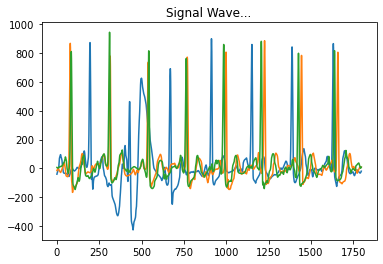

In [64]:
div_dir = '/Users/felix/OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER/Documents/Doctorado/TAREAS/dividido/'
mat = sio.loadmat(os.path.join(div_dir, 'A00001_1.mat'))
mat1 = sio.loadmat(os.path.join(div_dir, 'A00001_2.mat'))      
mat2 = sio.loadmat(os.path.join(div_dir, 'A00001_3.mat')) 
plt.figure(1)
plt.title('Signal Wave...')
plt.plot(mat['val'][0,0:1799])
plt.plot(mat1['val'][0,0:1799])
plt.plot(mat2['val'][0,0:1799])

plt.show()



[[[-0.02 ]
  [-0.02 ]
  [-0.02 ]
  ...
  [-0.051]
  [-0.053]
  [-0.055]]

 [[ 0.492]
  [ 0.488]
  [ 0.484]
  ...
  [ 0.001]
  [ 0.   ]
  [-0.003]]

 [[-0.025]
  [-0.026]
  [-0.028]
  ...
  [-0.062]
  [-0.059]
  [-0.057]]

 ...

 [[ 0.014]
  [ 0.011]
  [ 0.008]
  ...
  [-0.118]
  [-0.132]
  [-0.14 ]]

 [[ 0.053]
  [ 0.066]
  [ 0.078]
  ...
  [-0.146]
  [-0.141]
  [-0.129]]

 [[-0.054]
  [-0.055]
  [-0.056]
  ...
  [-0.066]
  [-0.065]
  [-0.063]]]


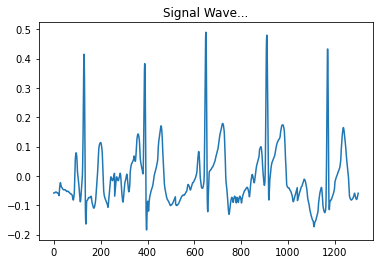

In [6]:
import numpy as np
import os as os
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def _read_file(file_path):
        items_corpus =np.load(file_path, allow_pickle=True)
        if file_path[:-3].find("undim")!= -1:
            items_corpus =pd.get_dummies(items_corpus).values
        return items_corpus
    
    
div_dir = '/Users/felix/OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER/Documents/Doctorado/TAREAS/'

#xdata=np.load(os.path.join(div_dir, 'undim-ydata.npy'), allow_pickle=True)
xdata=_read_file(os.path.join(div_dir, 'xdata.npy'))
print(xdata)
xdata.shape

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(xdata[50,:])

plt.show()

